# 데이터 시각화하기

In [1]:
%autosave 0

Autosave disabled


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel("./files_02/kto_total.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [4]:
df.describe()

,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%)
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000
mean,14151.834914,310.131178,61.251149,303.418822,3383.024713,18209.660776,62.111801,1.666673
std,52351.026147,1043.723255,250.858698,2116.778318,10269.311046,62120.322558,24.763256,5.915041
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,500.000000,17.000000,1.000000,7.000000,219.000000,953.000000,44.313500,0.064000
50%,1218.500000,50.000000,5.000000,26.000000,611.000000,2235.500000,68.568500,0.147000
75%,5805.000000,225.250000,25.000000,85.000000,1854.250000,9773.750000,80.739750,0.736500
max,823016.000000,25012.000000,3763.000000,44291.000000,137898.000000,917519.000000,100.000000,58.557000


# 한글 폰트 지원 라이브러리
```
# 시각화 폰트 라이브러리
from matplotlib import font_manager, rc

# 운영체제 확인하는 라이브러리
import platform

# 한글처리
# -윈도우용
plt.rc("font", family="Malgun Gothic")

# -Mac용
plt.rc("font", family="AppleGothic")

## 운영체제별 폰트 정의하기(가끔 안됨)
if platform.system() == "Windows":
  path = "C:/Windows/Fonts/malgun.ttf"
  font_name = font_manager.FontProperties(fname=path).get_name()
  rc("font", family=font_name)
  
 elif platform.system() == "Darwin":
   rc("font", family="AppleGothic")
 else:
   print("Check your OS System")
   
# 음수 기호 처리 설정
plt.rcParams['axes.unicode_minus'] = False
```

In [5]:
from matplotlib import font_manager, rc
import platform

In [6]:
# 한글처리 기본적으로 사용
# -윈도우용
plt.rc("font", family="Malgun Gothic")

# -Mac용
# plt.rc("font", family="AppleGothic")

In [7]:
# 음수 기호 처리 설정
plt.rcParams['axes.unicode_minus'] = False

In [8]:
df_filter = df[df["국적"] == "중국"]
print(len(df_filter))
df_filter.head(1)

116


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.086


# 선 그래프 그리기
## plt.plot(x, y)
- x: x축 기준 컬럼
- y: y축 기준 컬럼

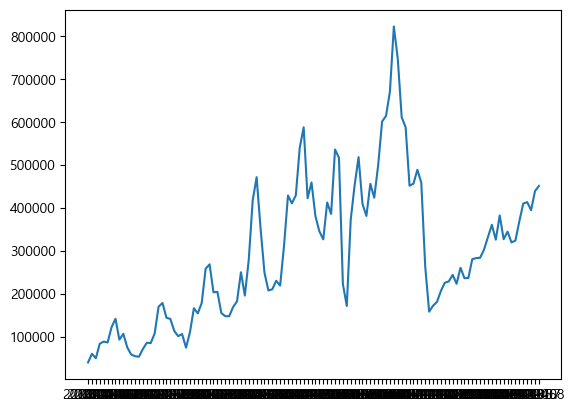

In [9]:
plt.plot(df_filter["기준년월"], df_filter["관광"])
plt.show()

# 그래프 디자인
- plt.figure(figsize=(너비, 높이))
- plt.title("그래프 제목")
- plt.xlabel("x축 제목")
- plt.ylabel("y축 제목")
- plt.xticks(["파일에 실제 존재하는 값", "  ", ... ]): x축을 실제 존재하는 값만 표시

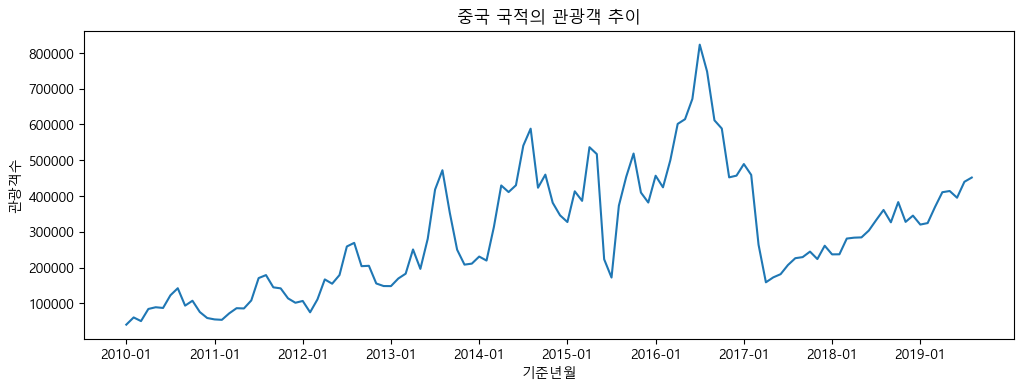

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(df_filter["기준년월"], df_filter["관광"])
plt.title("중국 국적의 관광객 추이")
plt.xlabel("기준년월")
plt.ylabel("관광객수")

plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01","2014-01", "2015-01",
           "2016-01", "2017-01", "2018-01", "2019-01"])

plt.show()

# 피벗테이블 형태를 df 형태로 변환하기
- 피벗테이블.reset_index(inplace=True)
- inplace=True: 원본 데이터 바뀜, 메모리에 자동 저장, 여러번 실행시 계속 추가됨 default False

In [22]:
# 우리나라에 방문하는 외국인 관광객이 가장 많은 국가 순으로 top5 조회하기
temp = df.pivot_table(values="전체비율(%)",
              index="국적",
              aggfunc="mean").sort_values("전체비율(%)", ascending=False).head(5)
temp.reset_index(inplace=True)
temp
# 일반적인 df형태가 아님

,국적,전체비율(%)
0,중국,32.114224
1,일본,28.352414
2,대만,6.648276
3,미국,6.035784
4,홍콩,4.646483


# series
: tuple = series

In [24]:
cntry_list = temp["국적"]
cntry_list

0    중국
1    일본
2    대만
3    미국
4    홍콩
Name: 국적, dtype: object

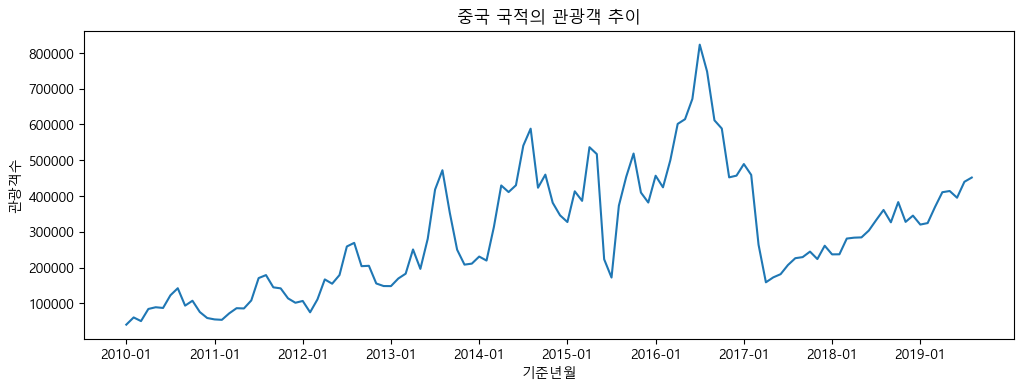

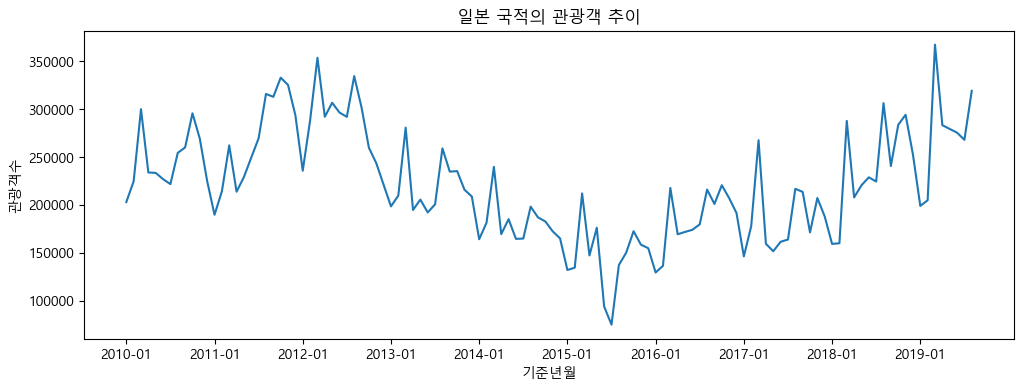

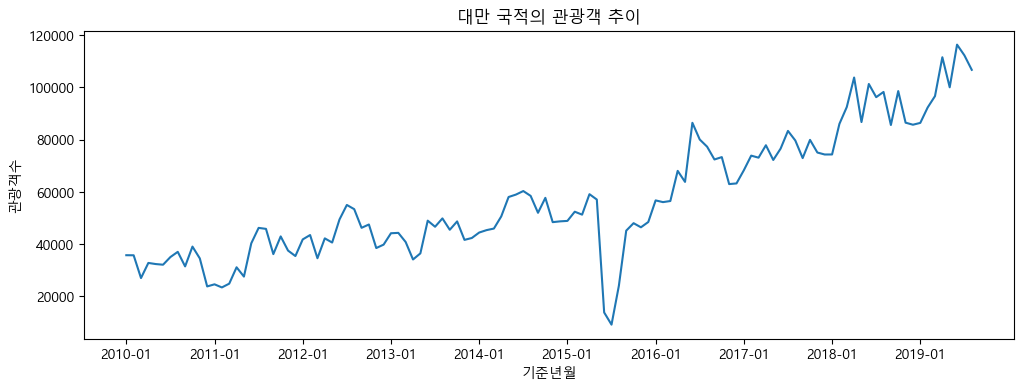

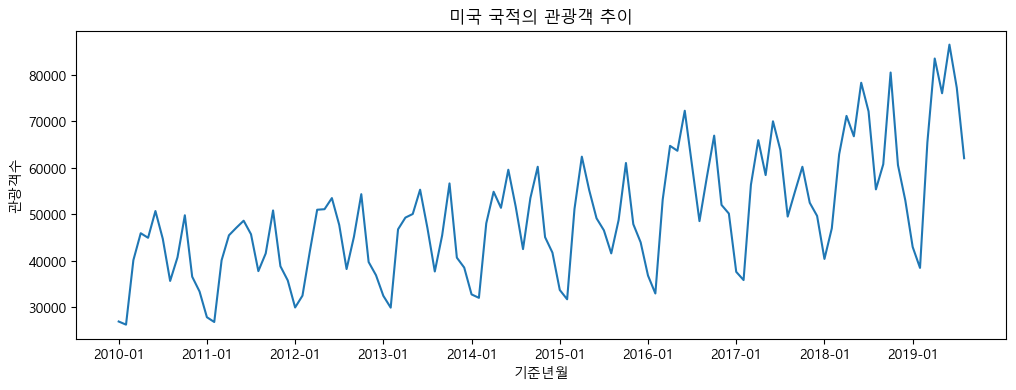

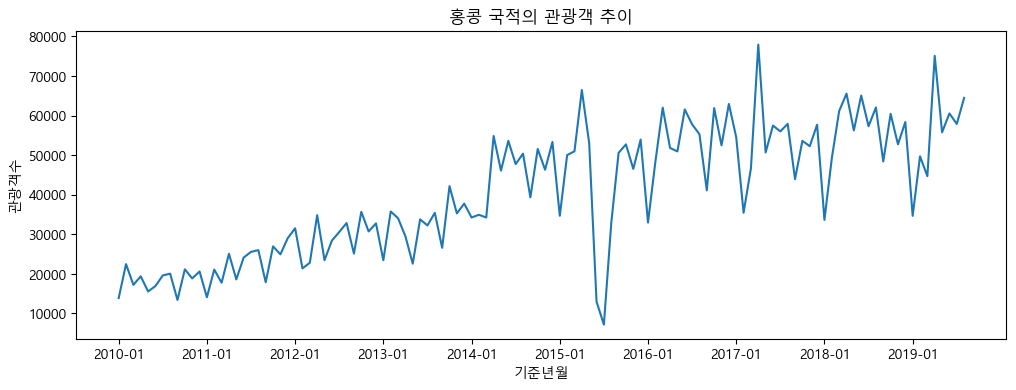

In [26]:
# 관광객 top5 국가들의 기준년월별 관광객수 그래프 그리기
for cntry in cntry_list:
    condition = df["국적"] == cntry
    df_filter = df[condition]
    plt.figure(figsize=(12, 4))
    plt.plot(df_filter["기준년월"], df_filter["관광"])
    plt.title("{} 국적의 관광객 추이".format(cntry))
    plt.xlabel("기준년월")
    plt.ylabel("관광객수")

    plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01","2014-01", "2015-01",
               "2016-01", "2017-01", "2018-01", "2019-01"])

    plt.show()

# 년도 및 월별 입국객수의 추이분석

In [43]:
test_arr = []
test_arr += "2010", "2011"
test_arr += "1245"
test_arr

['2010', '2011', '1', '2', '4', '5']

In [34]:
# 년도 및 월에 대한 컬럼 추가
# 기준년월에서 년도 , 월을 각각 추출해서 df에 "년도", "월" 컬럼 추가하기
# df["기준년월"]은 series
y_list = []
m_list = []
ym_list = df["기준년월"]
for ym in ym_list:
    yyyy, mm = ym.split("-")
    y_list.append(yyyy)
    m_list.append(mm)
df["년도"] = y_list
df["월"] = m_list
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.387,3.461,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.000,0.138,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.076,3.337,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.222,0.041,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.598,0.051,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.784,0.166,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.158,0.003,2019,08


In [68]:
# 방법1
y_list = []
m_list = []

for i in range(0, len(df), 1):
    y_list.append(df["기준년월"][i][:4])
    m_list.append(df["기준년월"][i][5:])
    
df["년도"] = y_list
df["월"] = m_list
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.387,3.461,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.000,0.138,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.076,3.337,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.222,0.041,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.598,0.051,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.784,0.166,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.158,0.003,2019,08


In [73]:
# 방법2
"""
df["기준년월"].str
--> 각각의 값들을 문자열로 바꿈
"""
df["년도"] = df["기준년월"].str.slice(0, 4)
df["월"] = df["기준년월"].str.slice(5, 7)

In [74]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.960,50.603,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.321,8.929,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.387,3.461,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.000,0.138,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.076,3.337,2010,01


In [76]:
df_filter = df[(df["국적"] == "중국")]
df_filter.head(1)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.086,2010,01


# 히트맵 그리기
### seaborn 라이브러리
- seaborn 쓰려면 matplotlib 호출해야함

## 피벗테이블 형태의 데이터 만들기
- df.pivot_table()
- 피벗테이블 =/= DataFrame

In [80]:
# index: 년도
# columns: 월
# values: 관광
# 사용하는 함수 속성 제시 안함
df_pivot = df_filter.pivot_table(index="년도", 
                                 columns="월", 
                                 values="관광", 
                                 aggfunc="mean")
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

## sns.heatmap(data, ...)
- annot=True: 숫자 값 표시

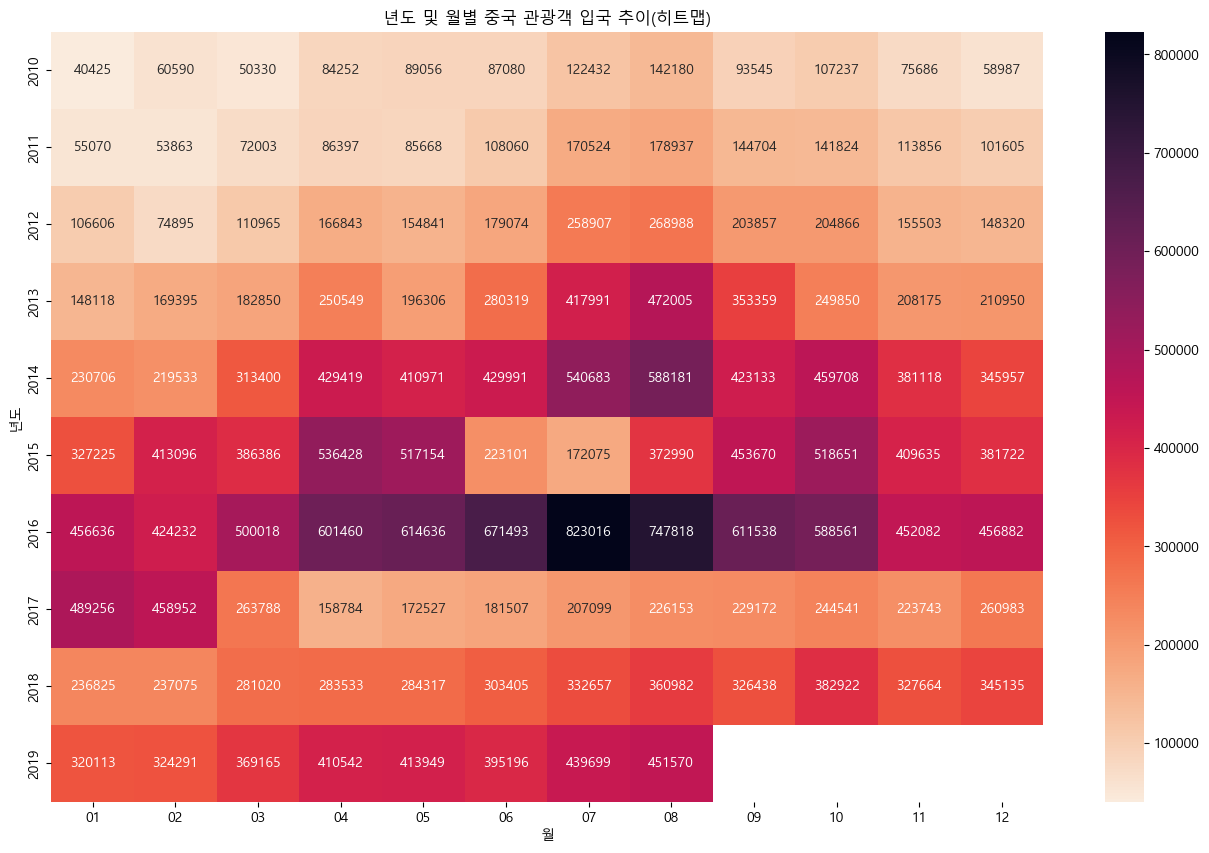

In [85]:
# 1. 그래프 크기 지정 너비 16, 높이 10
plt.figure(figsize=(16, 10))

# 2. 히트맵 그래프 함수에 데이터 넣기
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")

# 3. 그래프 제목 넣기
plt.title("년도 및 월별 중국 관광객 입국 추이(히트맵)")

# 4. 그래프 보여주기
plt.show()

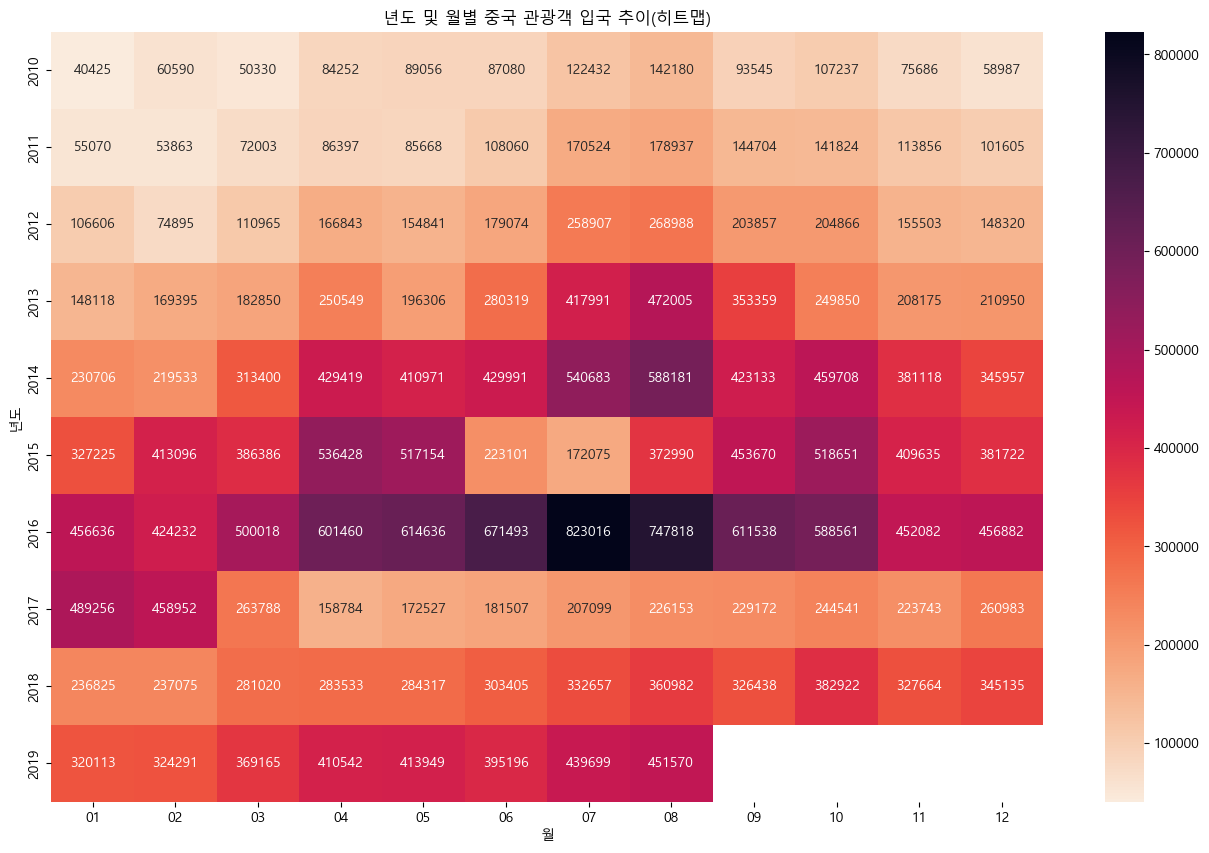

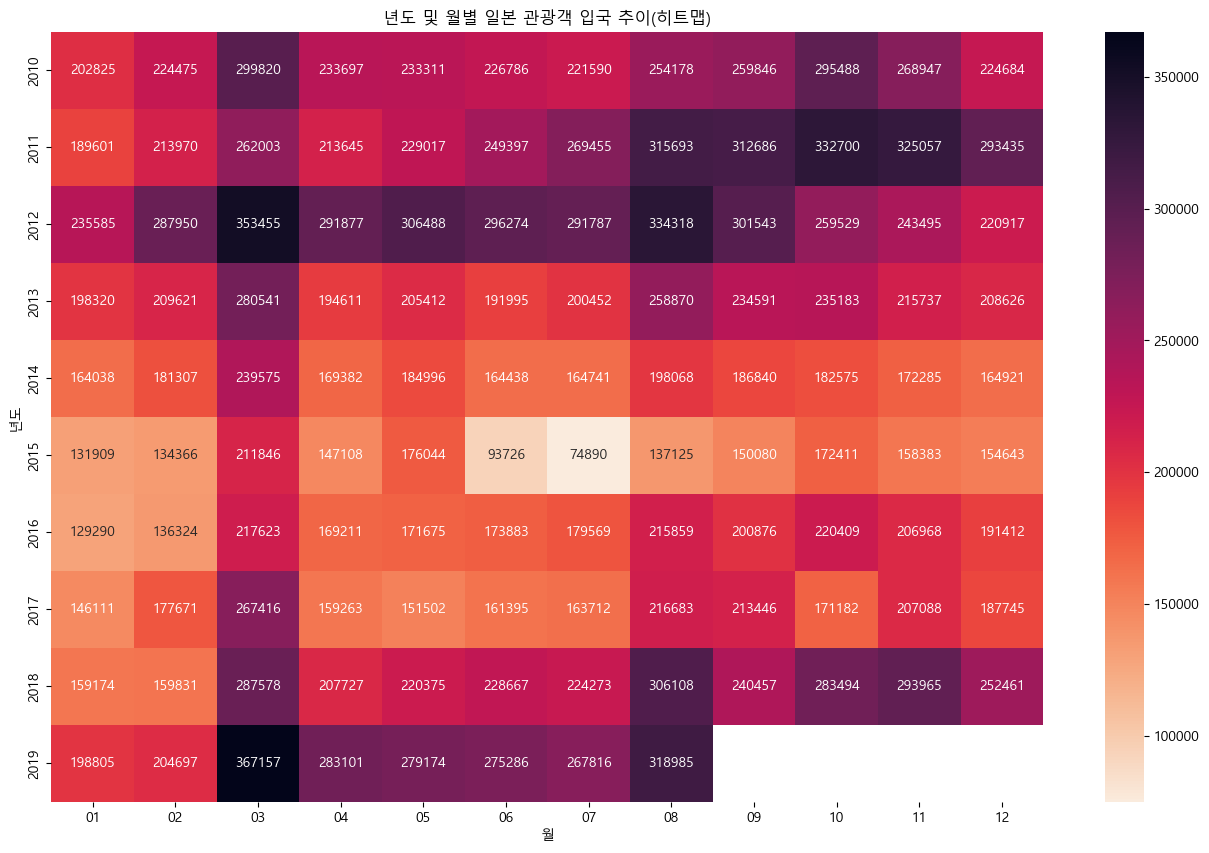

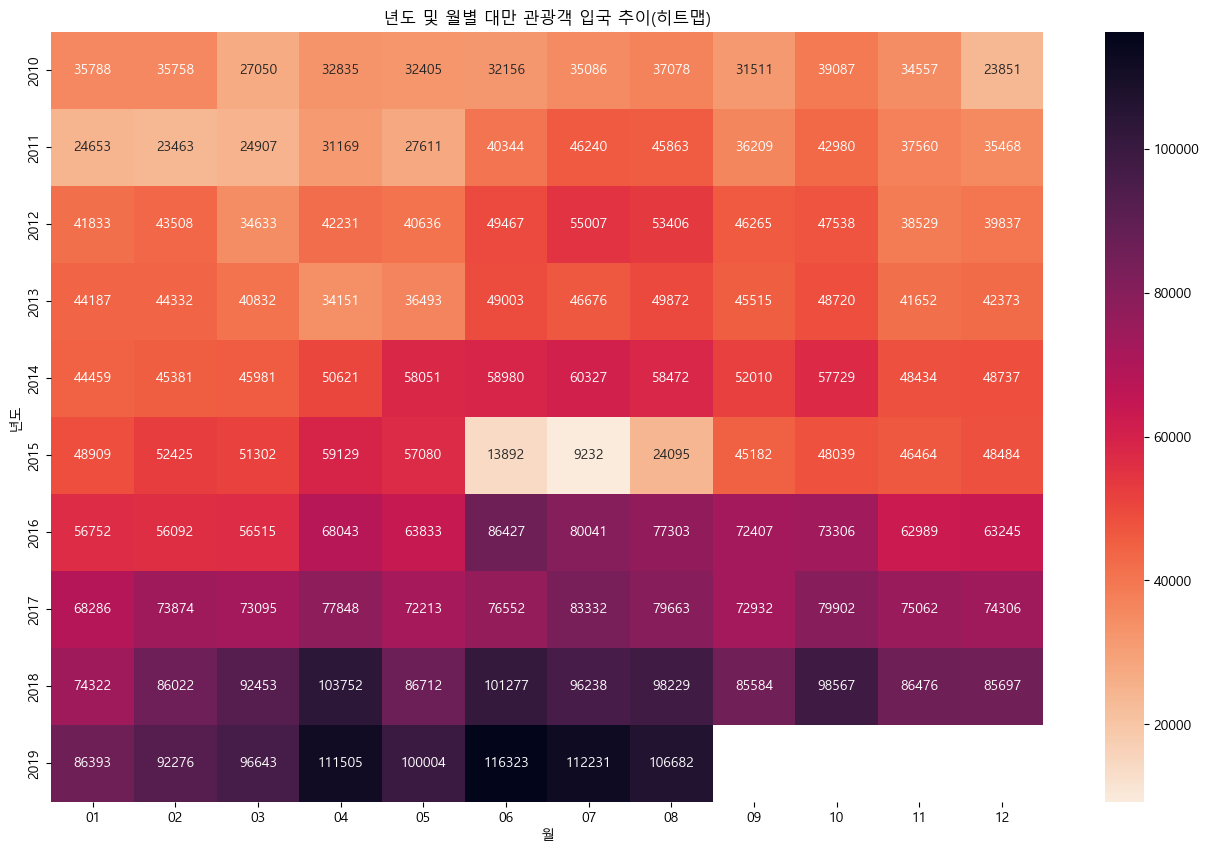

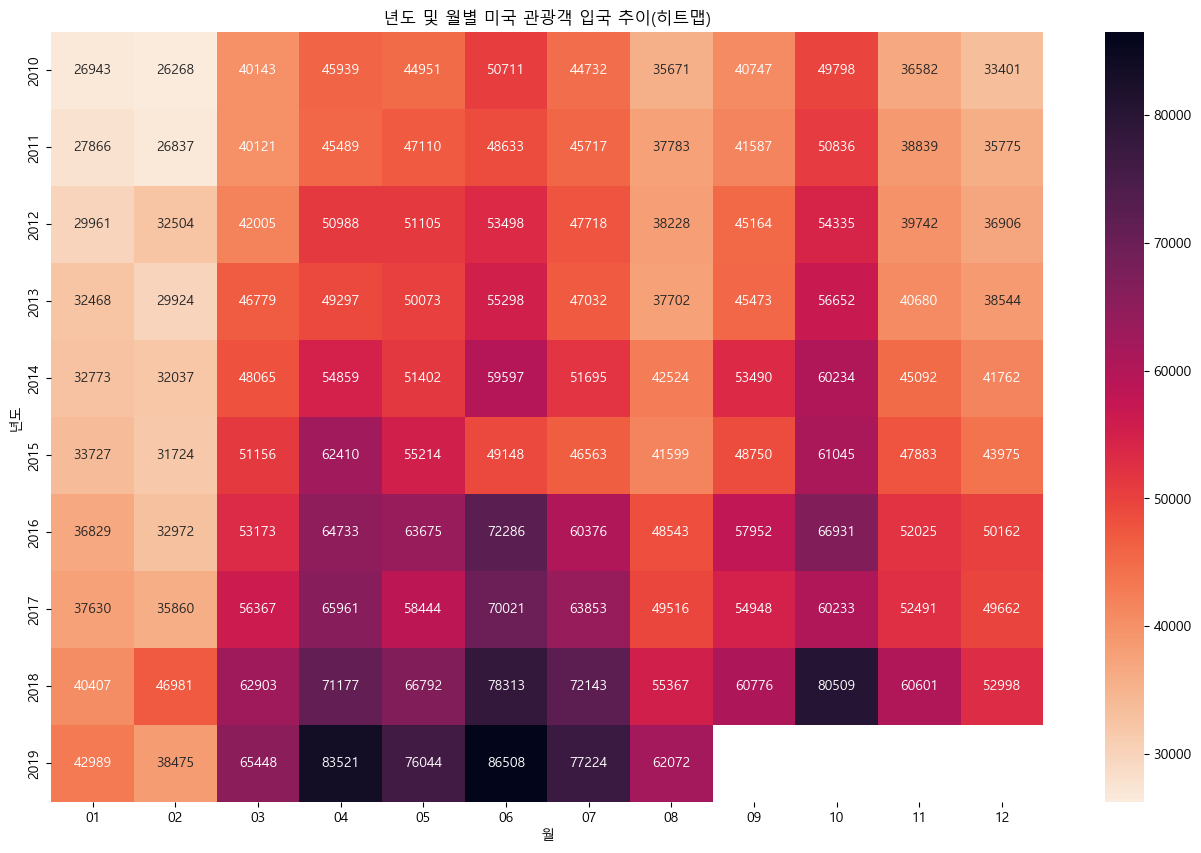

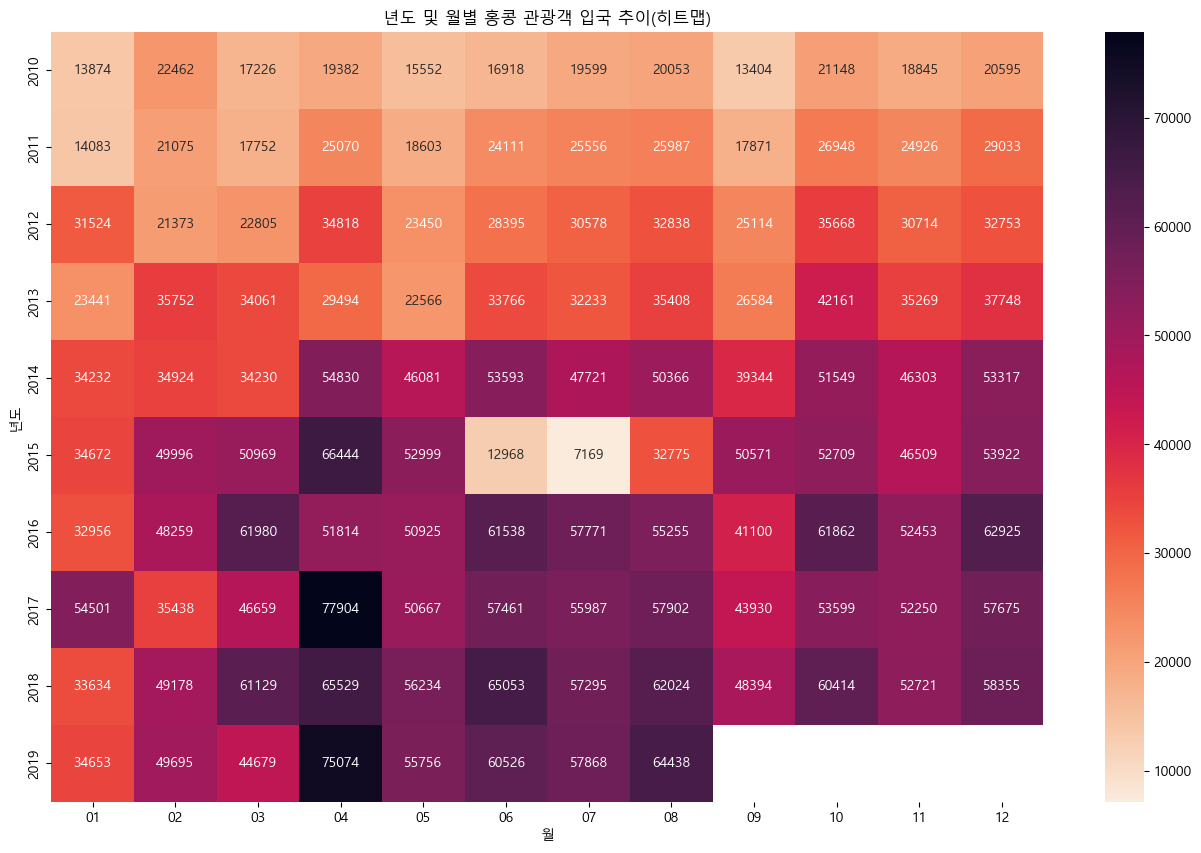

In [91]:
# top5 국가에 대한 히트맵 그리기
for cntry in cntry_list:
    df_filter = df[(df["국적"] == cntry)]
    df_pivot = df_filter.pivot_table(index="년도", 
                                     columns="월",
                                     values="관광", 
                                    aggfunc="mean")
    plt.figure(figsize=(16, 10))
    sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")
    plt.title("년도 및 월별 {} 관광객 입국 추이(히트맵)".format(cntry))
    plt.show()